# Deep Learning Discussions

## MNIST Hello World (as before)

In [1]:
import matplotlib.pyplot as plt

def plotTraining(history):
    # summarize history for accuracy
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='lower right')
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper right')
    plt.show()

2024-11-10 13:10:44.440606: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-10 13:10:45.321348: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-10 13:10:46.800858: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-10 13:10:46.955977: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-10 13:10:46.956016: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] co

Epoch 1/5


I0000 00:00:1731240648.512896    1006 service.cc:145] XLA service 0x7fb978009910 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731240648.512933    1006 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Ti SUPER, Compute Capability 8.9
2024-11-10 13:10:48.532171: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-10 13:10:48.604591: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


 155/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6641 - loss: 1.2545

I0000 00:00:1731240649.242216    1006 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8712 - loss: 0.4738 - val_accuracy: 0.9527 - val_loss: 0.1609
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9564 - loss: 0.1475 - val_accuracy: 0.9626 - val_loss: 0.1283
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9684 - loss: 0.1067 - val_accuracy: 0.9655 - val_loss: 0.1066
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9756 - loss: 0.0829 - val_accuracy: 0.9706 - val_loss: 0.0963
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9805 - loss: 0.0659 - val_accuracy: 0.9721 - val_loss: 0.0900


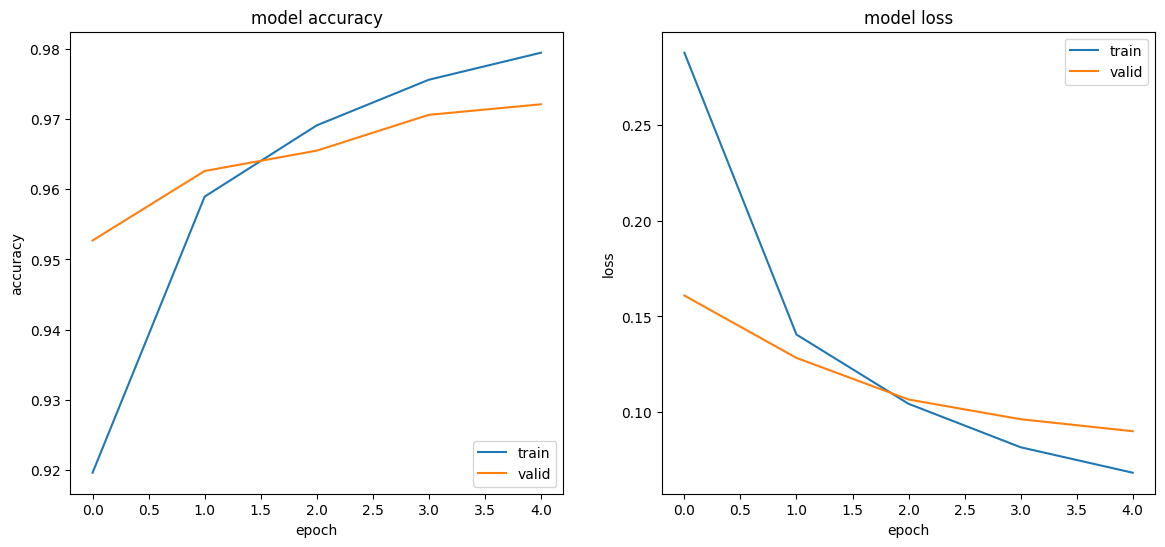

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - accuracy: 0.9682 - loss: 0.1022


[0.09002374857664108, 0.972100019454956]

In [2]:
# hello world example

import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(28,28)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)
plotTraining(history)

model.evaluate(x_test, y_test)


## Activation Functions

- Differnt Types of Activation Functions. What do you obeserve? Training speed, final performance, etc...
- Why do we need them at all?


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8577 - loss: 0.5021 - val_accuracy: 0.9507 - val_loss: 0.1700
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9527 - loss: 0.1597 - val_accuracy: 0.9616 - val_loss: 0.1281
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9678 - loss: 0.1103 - val_accuracy: 0.9676 - val_loss: 0.1112


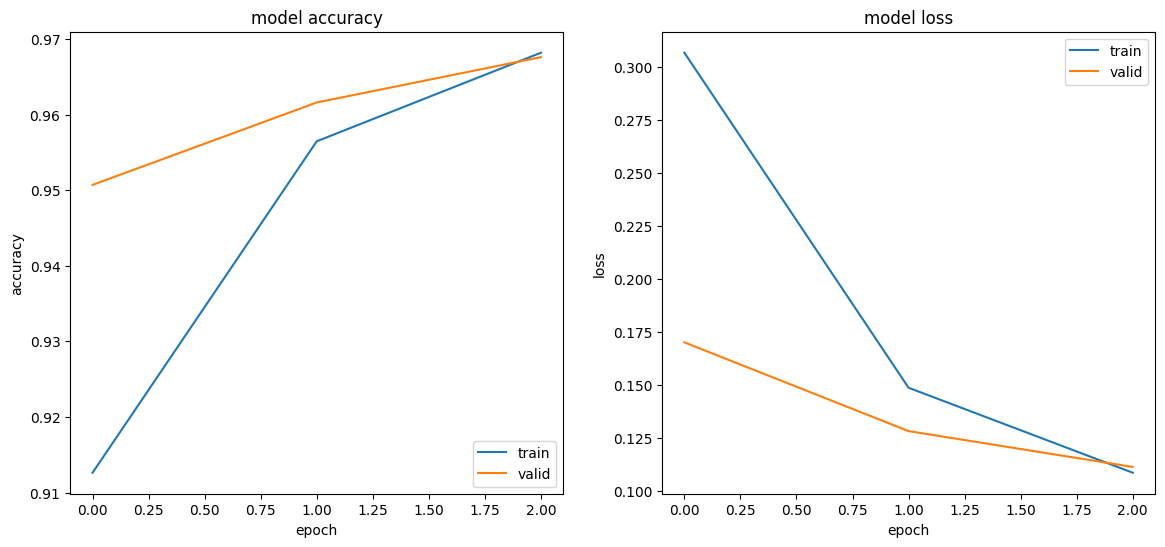

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - accuracy: 0.9619 - loss: 0.1250


[0.11123702675104141, 0.9675999879837036]

In [3]:
# no activation function (linear)
# https://keras.io/activations/

import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(28,28)),
  tf.keras.layers.Flatten(),

  #PLAY AROUND HERE
 
  tf.keras.layers.Dense(64, activation=tf.nn.relu),
  #tf.keras.layers.Dense(64), #linear
  #tf.keras.layers.Dense(64, activation=tf.nn.sigmoid),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3)
plotTraining(history)

model.evaluate(x_test, y_test)

## Optimization - Weight initialization

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8627 - loss: 0.4998 - val_accuracy: 0.9512 - val_loss: 0.1704
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9563 - loss: 0.1509 - val_accuracy: 0.9626 - val_loss: 0.1285
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9717 - loss: 0.0981 - val_accuracy: 0.9689 - val_loss: 0.1076


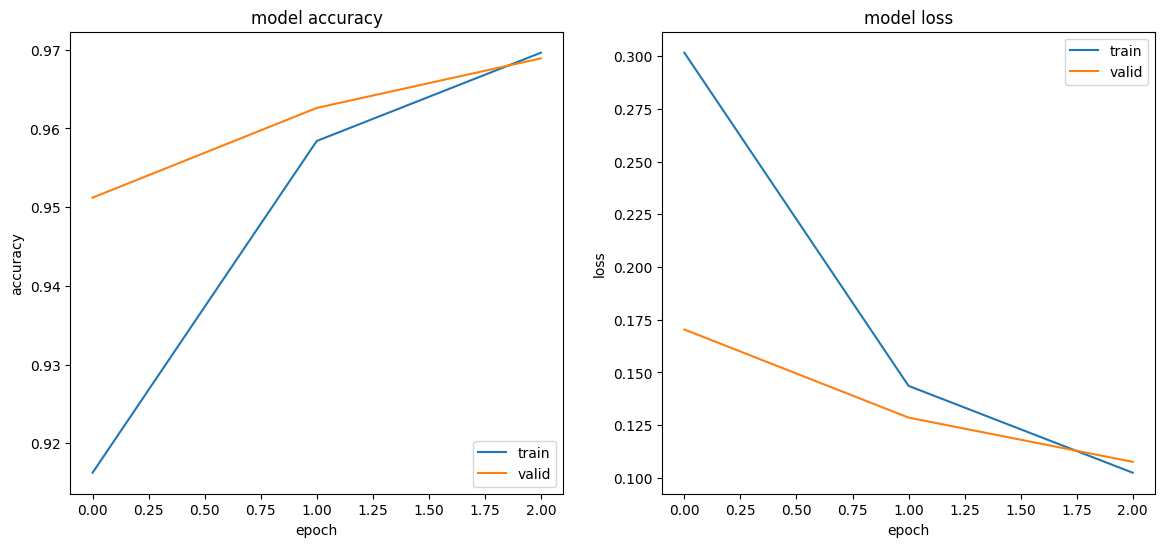

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9642 - loss: 0.1224


[0.10755373537540436, 0.9689000248908997]

In [4]:
# weight initialization
# https://keras.io/initializers/

import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(28,28)),
  tf.keras.layers.Flatten(),
  
  #PLAY AROUND HERE
  
  tf.keras.layers.Dense(64, activation=tf.nn.relu),
  #tf.keras.layers.Dense(64, activation=tf.nn.relu,  kernel_initializer=tf.keras.initializers.Zeros()),
  #tf.keras.layers.Dense(64, activation=tf.nn.relu,  kernel_initializer=tf.keras.initializers.Constant(value=-1)),
  #tf.keras.layers.Dense(64, activation=tf.nn.relu,  kernel_initializer=tf.keras.initializers.Constant(value=1)),
  
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3)
plotTraining(history)

model.evaluate(x_test, y_test)

## Optimization - Stochastic Gradient Descent

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8605 - loss: 0.4963 - val_accuracy: 0.9491 - val_loss: 0.1641
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9549 - loss: 0.1517 - val_accuracy: 0.9640 - val_loss: 0.1184
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9682 - loss: 0.1051 - val_accuracy: 0.9685 - val_loss: 0.1016
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9753 - loss: 0.0822 - val_accuracy: 0.9715 - val_loss: 0.0946
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9797 - loss: 0.0665 - val_accuracy: 0.9721 - val_loss: 0.0944
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9835 - loss: 0.0555 - val_accuracy: 0.9736 - val_loss: 0.0857
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9857 - loss: 0.0474 - val_accuracy: 0.9746 - val_loss: 0.0851
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9876 - loss: 0.0400 - 

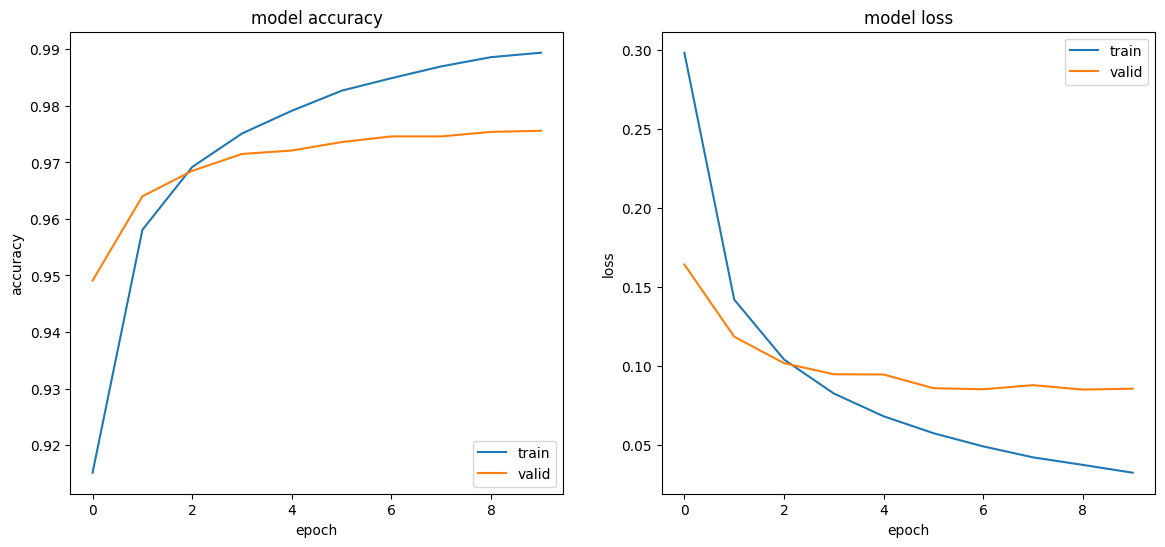

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9707 - loss: 0.1043


[0.08542705327272415, 0.975600004196167]

In [5]:
# optimizer & stochastic gradient descent
# https://keras.io/optimizers/

import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(28,28)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

#PLAY AROUND HERE
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)
#history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3, batch_size=1) #sgd
#history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3, batch_size=len(x_train)) #batch gradient descent
#history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3, batch_size=64) #32 default
plotTraining(history)

model.evaluate(x_test, y_test)


## Data Augmentation to increase performance

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 351ms/step - accuracy: 0.1364 - loss: 2.3298 - val_accuracy: 0.1785 - val_loss: 2.1771
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.2767 - loss: 2.0447 - val_accuracy: 0.2900 - val_loss: 2.0292
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.5415 - loss: 1.8320 - val_accuracy: 0.4091 - val_loss: 1.8963
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.6616 - loss: 1.6681 - val_accuracy: 0.5026 - val_loss: 1.7661
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.6977 - loss: 1.4990 - val_accuracy: 0.5705 - val_loss: 1.6384
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.7538 - loss: 1.3320 - val_accuracy: 0.6209 - val_loss: 1.5193
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.8648 - loss: 1.1968 - val_accuracy: 0.6642 - val_loss: 1.4137
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.8834 - loss: 1.0684 - val_accuracy: 0.6859 - val_loss: 1.3217

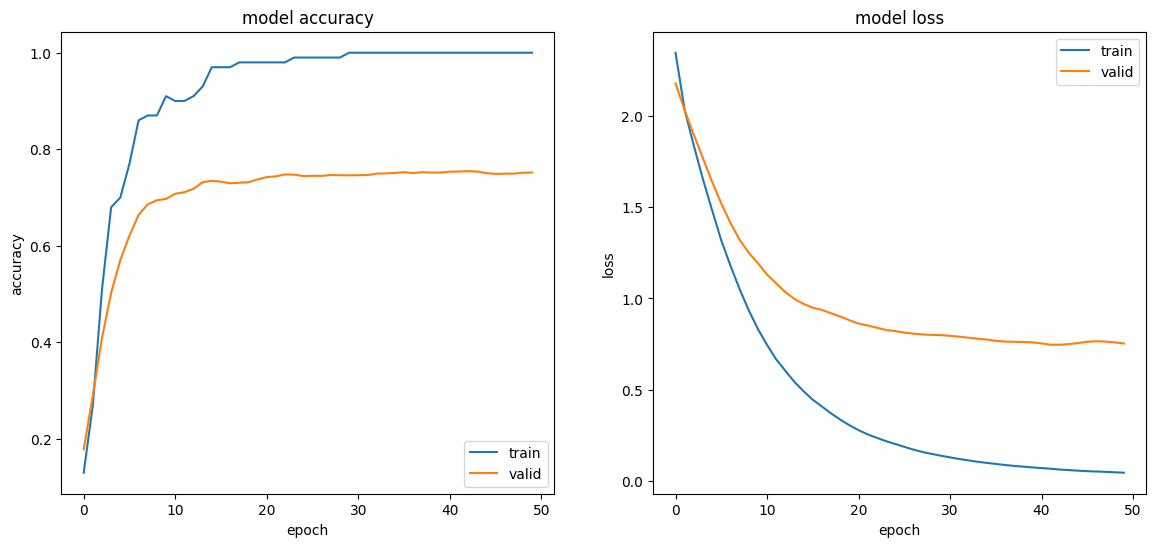

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - accuracy: 0.7274 - loss: 0.8516


[0.7532386779785156, 0.7519000172615051]

In [6]:
#no data augmentation
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Make train data smaller -- only 100 examples!
np.random.seed(36)
train_data_idx=np.random.choice(range(0,len(x_train)),100,replace=False)
x_train=x_train[train_data_idx]
y_train=y_train[train_data_idx]

x_train=x_train.reshape((len(x_train),28,28,1))
x_test=x_test.reshape((len(x_test),28,28,1))

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(28,28,1)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))
plotTraining(history)

model.evaluate(x_test, y_test)

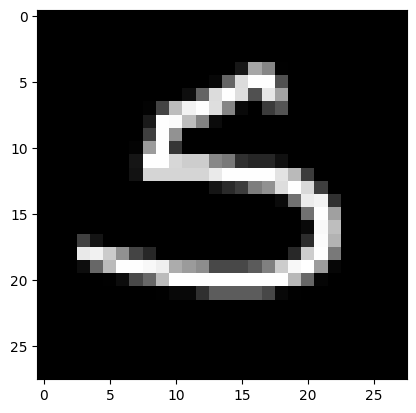

In [7]:
# do data aug
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15)

i=2
data_aug=datagen.flow(x=x_train[i:(i+1)], y=y_train[i:(i+1)], batch_size=1)
plt.imshow(x_train[i,:,:,0],cmap="gray")
# original image`

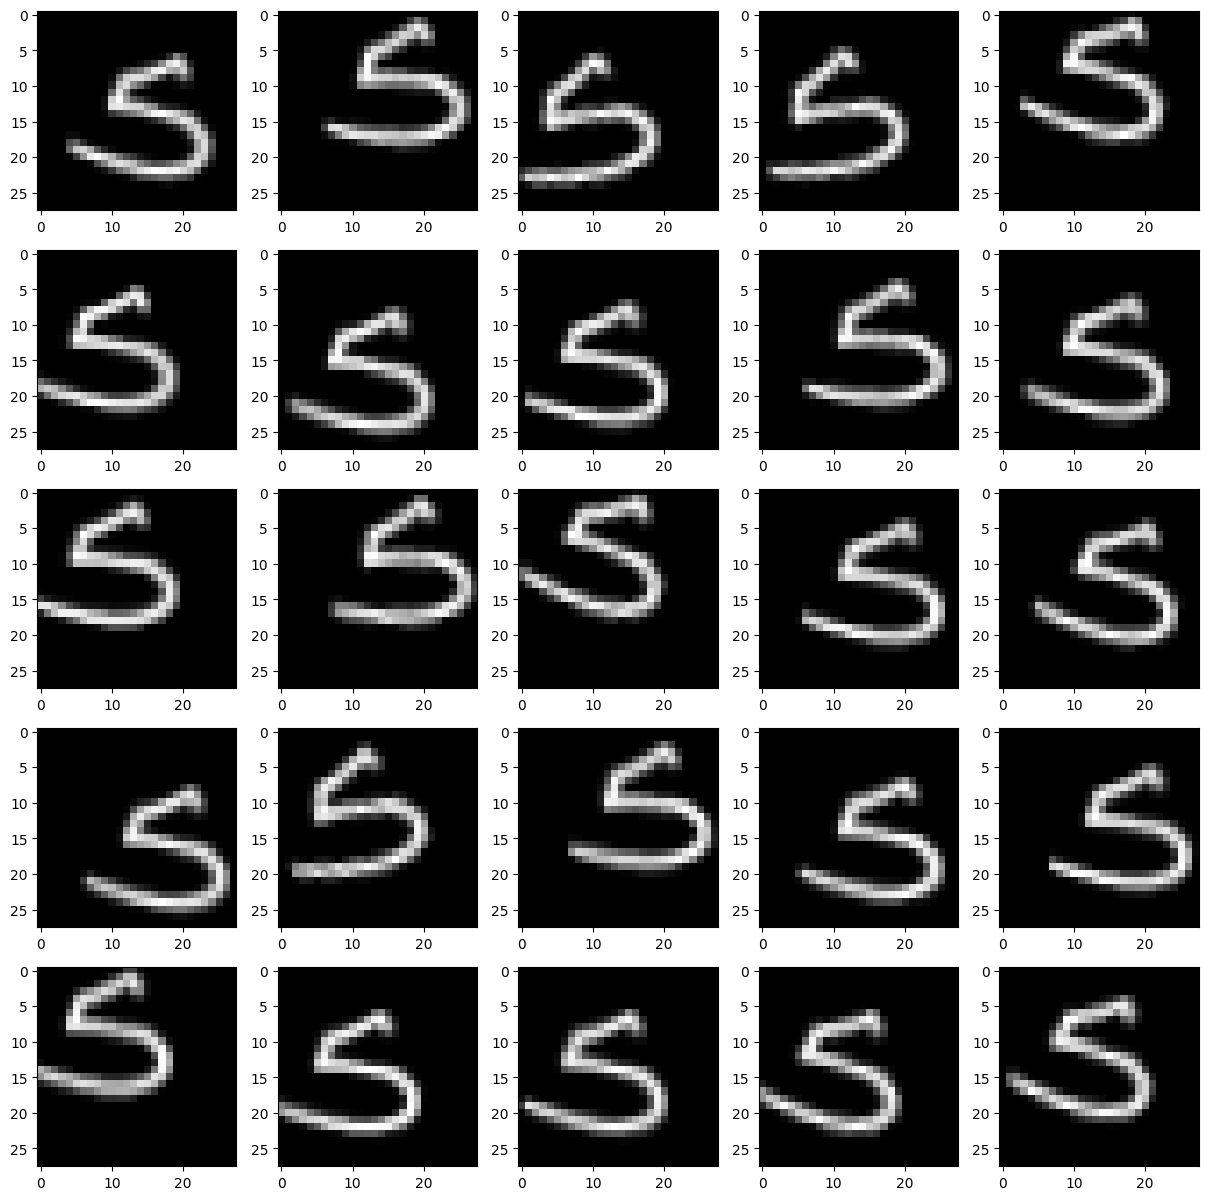

In [8]:
# augmented image
plt.figure(figsize=(15,15))
for i in range (0,25):
  plt.subplot(5,5,i+1)
  x_aug,y_aug=next(data_aug)
  plt.imshow(x_aug[0,:,:,0],cmap="gray")


Epoch 1/300


/home/fpschill/anaconda3/envs/cas_main_dl/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 285ms/step - accuracy: 0.1273 - loss: 2.2711 - val_accuracy: 0.1716 - val_loss: 2.3205
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.1642 - loss: 2.2476 - val_accuracy: 0.1499 - val_loss: 2.2883
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.1705 - loss: 2.2328 - val_accuracy: 0.1377 - val_loss: 2.2691
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.1442 - loss: 2.2333 - val_accuracy: 0.1453 - val_loss: 2.2377
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.2175 - loss: 2.2007 - val_accuracy: 0.1660 - val_loss: 2.2124
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.1997 - loss: 2.2512 - val_accuracy: 0.1925 - val_loss: 2.1701
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.0830 - loss: 2.2148 - val_accuracy: 0.2184 - val_loss: 2.1377
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.1497 - loss: 2.1471 - val_accuracy: 0.2466 - val_loss: 2.1070
Ep

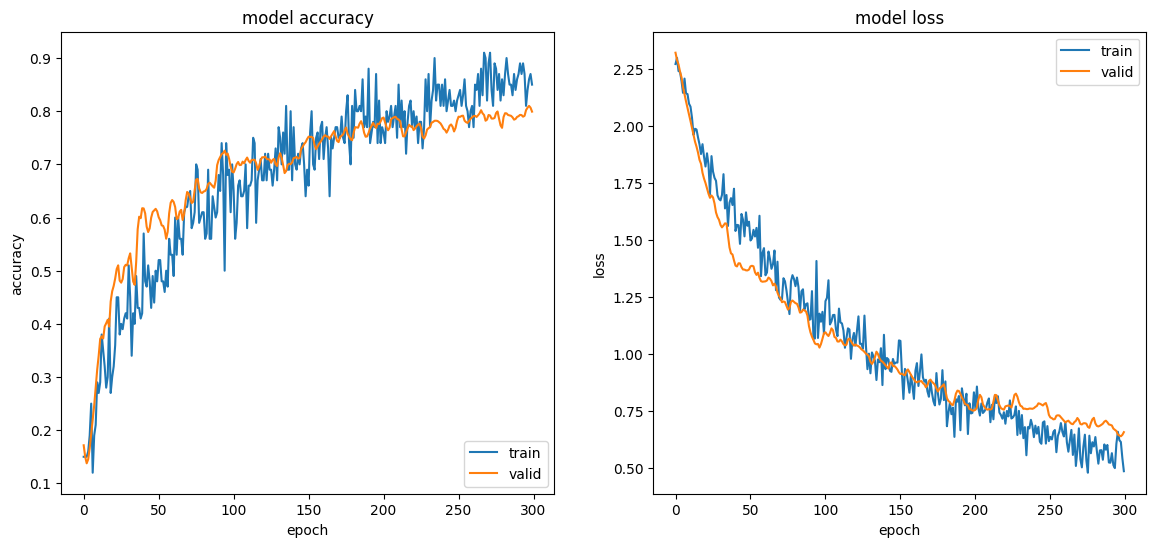

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - accuracy: 0.7749 - loss: 0.7331


[0.6555083394050598, 0.7991999983787537]

In [9]:
import math
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Make train data smaller -- only 100 examples!
np.random.seed(36)
train_data_idx=np.random.choice(range(0,len(x_train)),100,replace=False)
x_train=x_train[train_data_idx]
y_train=y_train[train_data_idx]

x_train=x_train.reshape((len(x_train),28,28,1))
x_test=x_test.reshape((len(x_test),28,28,1))

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(28,28,1)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15)

# fits the model on batches with real-time data augmentation:
history = model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=300, validation_data=(x_test, y_test))
plotTraining(history)

model.evaluate(x_test, y_test)

### Accuracy on the test set is around 10% better if you use data augmentation
0.7491 -> 0.8349
### Also: much less overfitting!

## Other Architecture: CNN

model from scratch 

Epoch 1/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.0900 - loss: 2.3124 - val_accuracy: 0.1244 - val_loss: 2.2944
Epoch 2/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.1500 - loss: 2.2897 - val_accuracy: 0.1975 - val_loss: 2.2849
Epoch 3/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.2600 - loss: 2.2713 - val_accuracy: 0.2252 - val_loss: 2.2746
Epoch 4/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.3100 - loss: 2.2523 - val_accuracy: 0.2381 - val_loss: 2.2619
Epoch 5/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.3400 - loss: 2.2304 - val_accuracy: 0.2516 - val_loss: 2.2456
Epoch 6/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.3400 - loss: 2.2034 - val_accuracy: 0.2619 - val_loss: 2.2253
Epoch 7/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.3400 - loss: 2.1706 - val_accuracy: 0.2670 - val_loss: 2.2001
Epoch 8/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.3500 - loss: 2.1309 - val_accuracy: 0.2730 - val_loss: 2.

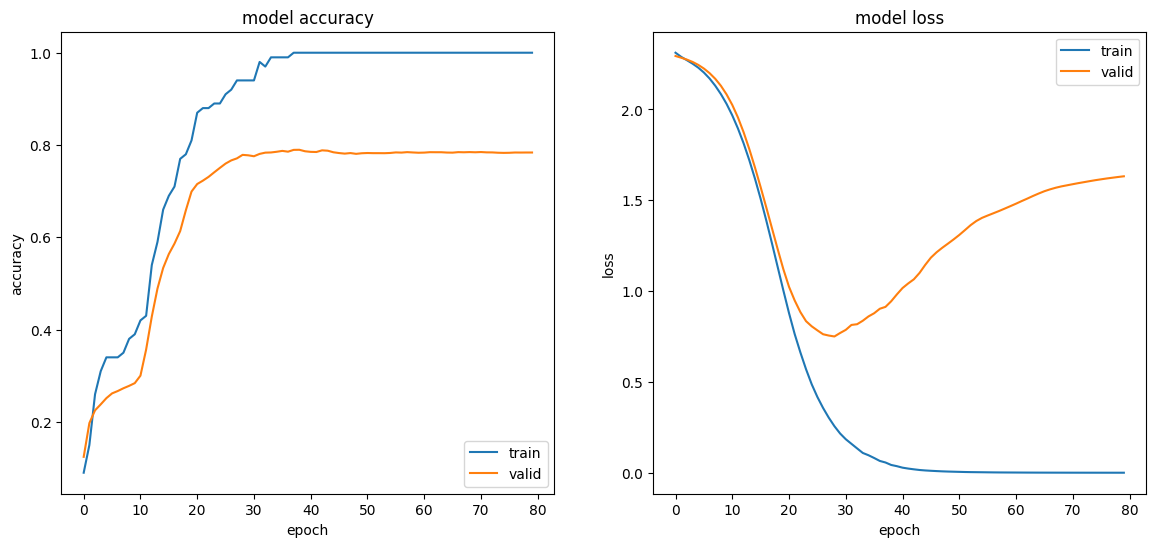

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7572 - loss: 1.8958


[1.6322780847549438, 0.7838000059127808]

In [10]:
from tensorflow.keras.models import Sequential, Model, clone_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist

(x_digits_train, y_digits_train), (x_digits_test, y_digits_test) = mnist.load_data()

# Make train data smaller
np.random.seed(36)
train_data_idx=np.random.choice(range(0,len(x_digits_train)),100,replace=False)
x_digits_train=x_digits_train[train_data_idx]
y_digits_train=y_digits_train[train_data_idx]

# Preprocess data 
x_digits_train = x_digits_train.astype('float32')
x_digits_test = x_digits_test.astype('float32')
x_digits_train = x_digits_train/ 255
x_digits_test = x_digits_test/ 255
x_digits_train=x_digits_train.reshape((len(x_digits_train),28,28,1))
x_digits_test=x_digits_test.reshape((len(x_digits_test),28,28,1))


# Define model 
model_digits = Sequential()
model_digits.add(Input(shape=(28,28,1)))
model_digits.add(Conv2D(8,(3,3),activation='relu'))
model_digits.add(Conv2D(8,(3,3),activation='relu'))
model_digits.add(MaxPooling2D((2,2)))
model_digits.add(Conv2D(16,(3,3),activation='relu'))
model_digits.add(Conv2D(16,(3,3),activation='relu'))
model_digits.add(Flatten())
model_digits.add(Dense(50, activation='relu'))
model_digits.add(Dense(10, activation='softmax'))
# Compile model
model_digits.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train model
history=model_digits.fit(x_digits_train, y_digits_train,validation_data=(x_digits_test, y_digits_test),
                         batch_size=128, epochs=80)
plotTraining(history)

model_digits.evaluate(x_digits_test,y_digits_test)

## CNN + Data-Augmentation

Epoch 1/120
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.2300 - loss: 11.7896 - val_accuracy: 0.7037 - val_loss: 2.1280
Epoch 2/120
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step - accuracy: 0.3456 - loss: 7.0992 - val_accuracy: 0.6872 - val_loss: 2.0781
Epoch 3/120
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - accuracy: 0.2952 - loss: 5.8526 - val_accuracy: 0.7104 - val_loss: 1.2854
Epoch 4/120
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - accuracy: 0.3546 - loss: 4.5164 - val_accuracy: 0.7148 - val_loss: 1.0080
Epoch 5/120
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step - accuracy: 0.3522 - loss: 3.3565 - val_accuracy: 0.7039 - val_loss: 0.9105
Epoch 6/120
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step - accuracy: 0.3404 - loss: 2.2429 - val_accuracy: 0.7090 - val_loss: 0.8420
Epoch 7/120
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - accuracy: 0.2767 - loss: 2.5320 - val_accuracy: 0.7088 - val_loss: 0.9047
Epoch 8/120
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - accuracy: 0.3465 - loss: 1.9457 - val_accuracy: 0.7084 - val

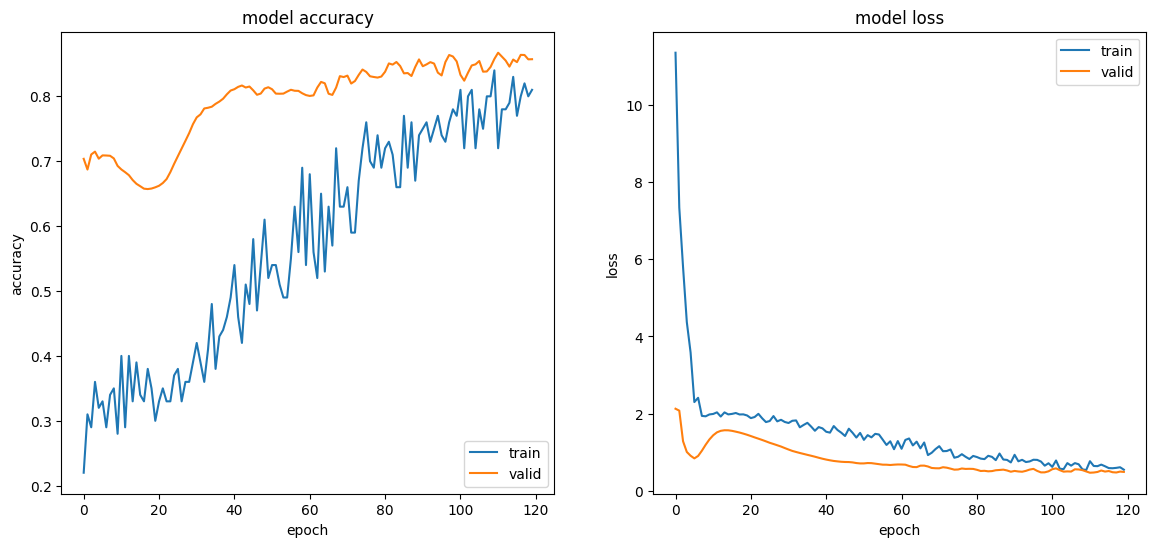

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8344 - loss: 0.5565


[0.49117493629455566, 0.857200026512146]

In [11]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15)

# fits the model on batches with real-time data augmentation:
history=model_digits.fit(datagen.flow(x_digits_train, y_digits_train, batch_size=64),validation_data=(x_digits_test, y_digits_test), epochs=120)
plotTraining(history)

model_digits.evaluate(x_digits_test,y_digits_test)

### Test performance summary (so far)

- simple model:
 
         0.7491 -> 0.8349
    
    
- CNN (for other task, much much higher!):
    
        0.7685 -> 0.8414

## CNN + Fine-Tuning

- train a model on letters (E-MNIST)
- fix lower layers and fine-tune to digits (MNIST)

In [15]:
# Downloading the data, if it does not exist (takes some time)
import os,sys,zipfile,wget
if "google.colab" in sys.modules:
    %pip install wget

if not(os.path.isfile("matlab.zip")): 
    filename=wget.download("https://biometrics.nist.gov/cs_links/EMNIST/matlab.zip", "matlab.zip")
if not(os.path.isdir("./matlab")):
    zf = zipfile.ZipFile(os.path.join(".","matlab.zip"), "r")
    zf.extractall()


In [16]:
#load emnist data
from scipy import io as spio

emnist = spio.loadmat("matlab/emnist-letters.mat")

# load training dataset
x_letter_train = emnist["dataset"][0][0][0][0][0][0]
y_letter_train = emnist["dataset"][0][0][0][0][0][1]

# load test dataset
x_letter_test = emnist["dataset"][0][0][1][0][0][0]
y_letter_test = emnist["dataset"][0][0][1][0][0][1]

x_letter_train = x_letter_train.reshape(x_letter_train.shape[0], 28, 28, 1, order="A")
x_letter_test = x_letter_test.reshape(x_letter_test.shape[0], 28, 28, 1, order="A")
x_letter_train = x_letter_train.astype('float32')
x_letter_test = x_letter_test.astype('float32')
x_letter_train /= 255
x_letter_test /= 255



Epoch 1/5
975/975 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5959 - loss: 1.3734 - val_accuracy: 0.8574 - val_loss: 0.4612
Epoch 2/5
975/975 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8678 - loss: 0.4183 - val_accuracy: 0.8886 - val_loss: 0.3547
Epoch 3/5
975/975 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8936 - loss: 0.3321 - val_accuracy: 0.9040 - val_loss: 0.3056
Epoch 4/5
975/975 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9055 - loss: 0.2912 - val_accuracy: 0.9112 - val_loss: 0.2785
Epoch 5/5
975/975 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9150 - loss: 0.2623 - val_accuracy: 0.9164 - val_loss: 0.2684


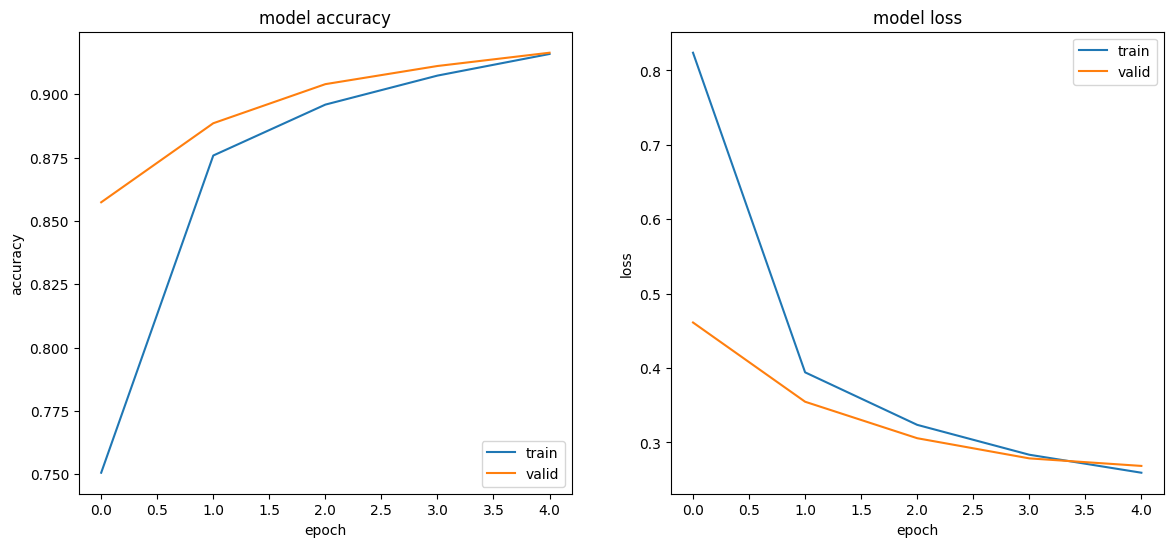

650/650 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9092 - loss: 0.2980


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 24, 24, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 12, 12, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 10, 10, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 8, 8, 16)       │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flat (Flatten)                  │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 50)             │        12,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 27)             │         1,377 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,139 (215.39 KB)

 Trainable params: 18,379 (71.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 36,760 (143.60 KB)

In [29]:
# Define model 
model_letters = Sequential()
model_letters.add(Conv2D(8,(3,3), activation='relu',input_shape=(28,28,1)))
model_letters.add(Conv2D(8,(3,3), activation='relu'))
model_letters.add(MaxPooling2D((2,2)))
model_letters.add(Conv2D(16,(3,3), activation='relu'))
model_letters.add(Conv2D(16,(3,3), activation='relu'))
model_letters.add(MaxPooling2D((2,2)))
model_letters.add(Flatten(name="Flat"))
model_letters.add(Dense(50, activation='relu'))
model_letters.add(Dense(27, activation='softmax'))
# Compile model
model_letters.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train model
history=model_letters.fit(x_letter_train, y_letter_train,validation_data=(x_letter_test, y_letter_test),
                         batch_size=128, epochs=5, verbose=1)
plotTraining(history)

model_letters.evaluate(x_letter_test,y_letter_test)
model_letters.summary()

In [31]:
letter_model = Model(inputs=model_letters.inputs, outputs=model_letters.get_layer("Flat").output)
letter_model.summary()

Model: "functional_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 24, 24, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 12, 12, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 10, 10, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 8, 8, 16)       │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flat (Flatten)                  │ (None, 256)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,152 (16.22 KB)

 Trainable params: 4,152 (16.22 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
x = letter_model.output
# add a hidden and the new output layer
x = Dense(50, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=letter_model.input, outputs=predictions)
model.summary()

Model: "functional_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 24, 24, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 12, 12, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 10, 10, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 8, 8, 16)       │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flat (Flatten)                  │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 50)             │        12,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,512 (68.41 KB)

 Trainable params: 17,512 (68.41 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
#fix the lower layers
for layer in letter_model.layers:
    layer.trainable = False
for i, layer in enumerate(model.layers):
   print(i, layer.name,layer.trainable)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

0 input_layer_12 False
1 conv2d_22 False
2 conv2d_23 False
3 max_pooling2d_9 False
4 conv2d_24 False
5 conv2d_25 False
6 max_pooling2d_10 False
7 Flat False
8 dense_24 True
9 dense_25 True


Model: "functional_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 24, 24, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 12, 12, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 10, 10, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 8, 8, 16)       │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flat (Flatten)                  │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 50)             │        12,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,512 (68.41 KB)

 Trainable params: 13,360 (52.19 KB)

 Non-trainable params: 4,152 (16.22 KB)

Epoch 1/80


/home/fpschill/anaconda3/envs/cas_main_dl/lib/python3.10/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_210']. Received: the structure of inputs=*
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.0823 - loss: 4.8857 - val_accuracy: 0.0887 - val_loss: 3.9210
Epoch 2/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.0979 - loss: 3.5658 - val_accuracy: 0.0885 - val_loss: 3.2975
Epoch 3/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.1298 - loss: 2.9052 - val_accuracy: 0.1233 - val_loss: 2.8412
Epoch 4/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.2010 - loss: 2.4333 - val_accuracy: 0.1804 - val_loss: 2.4428
Epoch 5/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.2804 - loss: 1.9878 - val_accuracy: 0.2818 - val_loss: 2.0779
Epoch 6/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.4154 - loss: 1.6220 - val_accuracy: 0.3986 - val_loss: 1.7596
Epoch 7/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.5200 - loss: 1.3148 - val_accuracy: 0.5038 - val_loss: 1.5025
Epoch 8/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.6840 - loss: 1.0608 - val_accuracy: 0.5864 - val_loss: 1.3056
Epoch 

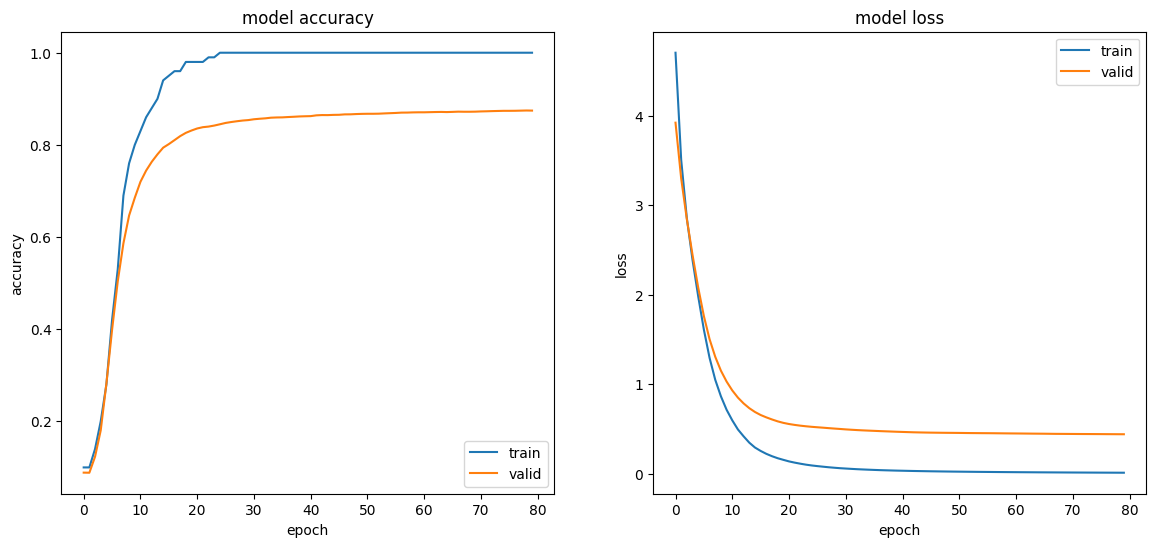

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8512 - loss: 0.5167


[0.4403018653392792, 0.8744000196456909]

In [34]:
#train
history=model.fit(x_digits_train, y_digits_train,validation_data=(x_digits_test, y_digits_test),
                         batch_size=64, epochs=80)
plotTraining(history)

model.evaluate(x_digits_test,y_digits_test)

### Test performance summary (so far)

- simple model:
 
         0.7491 -> 0.8349 (data aug.)
    
    
- CNN (for other task, much much higher!):
    
        0.7685 -> 0.8414 (data aug.)
        0.7685 -> 0.8974 (fine-tuning)

##  CNN + Data augmentation and Fine-Tuning


Epoch 1/120
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.0913 - loss: 3.6310 - val_accuracy: 0.1048 - val_loss: 3.1895
Epoch 2/120
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.1104 - loss: 3.2495 - val_accuracy: 0.1276 - val_loss: 2.8501
Epoch 3/120
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - accuracy: 0.1304 - loss: 2.9286 - val_accuracy: 0.1502 - val_loss: 2.6148
Epoch 4/120
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step - accuracy: 0.0875 - loss: 2.6723 - val_accuracy: 0.1922 - val_loss: 2.3504
Epoch 5/120
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - accuracy: 0.1973 - loss: 2.4512 - val_accuracy: 0.2467 - val_loss: 2.1309
Epoch 6/120
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.3163 - loss: 2.0557 - val_accuracy: 0.3000 - val_loss: 1.9607
Epoch 7/120
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - accuracy: 0.1904 - loss: 2.2560 - val_accuracy: 0.3632 - val_loss: 1.8042
Epoch 8/120
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - accuracy: 0.3137 - loss: 2.0441 - val_accuracy: 0.4310 - val_

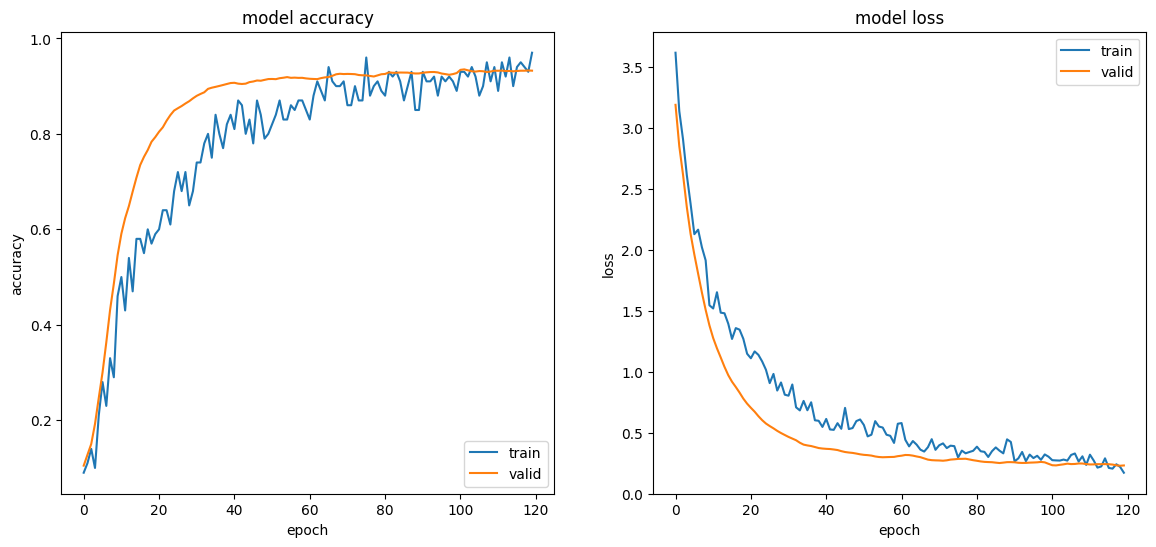

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9175 - loss: 0.2772


[0.23063357174396515, 0.9323999881744385]

In [37]:
letter_model = Model(inputs=model_letters.inputs, outputs=model_letters.get_layer("Flat").output)

x = letter_model.output
x = Dense(50, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)
model = Model(inputs=letter_model.input, outputs=predictions)
for layer in letter_model.layers:
    layer.trainable = False   
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15)

# fits the model on batches with real-time data augmentation:
history=model.fit(datagen.flow(x_digits_train, y_digits_train, batch_size=64),validation_data=(x_digits_test, y_digits_test), epochs=120)
plotTraining(history)

model.evaluate(x_digits_test,y_digits_test)

### Test performance summary
**trained ussing 100 images only!**

- simple model:
 
         0.7491 -> 0.8349 (data ug.)
    
- CNN (for other task, much much higher!):
    
        0.7685 -> 0.8414 (data aug.)
        0.7685 -> 0.8974 (fine-tuning)
        0.7685 -> 0.9251 (data aug. & fine-tuning)

## Error analysis

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8631 - loss: 0.4760 - val_accuracy: 0.9820 - val_loss: 0.0551
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9816 - loss: 0.0583 - val_accuracy: 0.9885 - val_loss: 0.0359
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9885 - loss: 0.0392 - val_accuracy: 0.9897 - val_loss: 0.0312
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9917 - loss: 0.0254 - val_accuracy: 0.9874 - val_loss: 0.0388
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9935 - loss: 0.0217 - val_accuracy: 0.9914 - val_loss: 0.0265


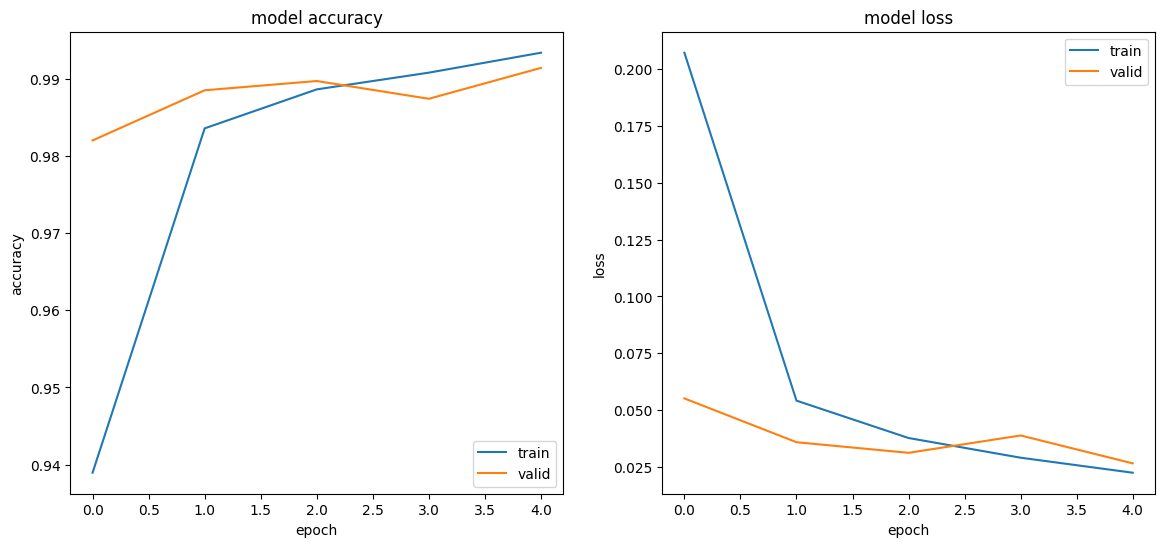

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9886 - loss: 0.0359


[0.026533249765634537, 0.9914000034332275]

In [38]:
## same network from scratch using all training data

(x_digits_train, y_digits_train), (x_digits_test, y_digits_test) = mnist.load_data()


# Preprocess data 
x_digits_train = x_digits_train.astype('float32')
x_digits_test = x_digits_test.astype('float32')
x_digits_train = x_digits_train/ 255
x_digits_test = x_digits_test/ 255
x_digits_train=x_digits_train.reshape((len(x_digits_train),28,28,1))
x_digits_test=x_digits_test.reshape((len(x_digits_test),28,28,1))


# Define model 
model_digits_full = Sequential()
model_digits_full.add(Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1)))
model_digits_full.add(Conv2D(16,(3,3),activation='relu'))
model_digits_full.add(MaxPooling2D((2,2)))
model_digits_full.add(Conv2D(32,(3,3),activation='relu'))
model_digits_full.add(Conv2D(32,(3,3),activation='relu'))

model_digits_full.add(Flatten())
model_digits_full.add(Dense(50, activation='relu'))
model_digits_full.add(Dense(10, activation='softmax'))
# Compile model
model_digits_full.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train model
history=model_digits_full.fit(x_digits_train, y_digits_train,validation_data=(x_digits_test, y_digits_test),
                         batch_size=128, epochs=5, verbose=1)
plotTraining(history)

model_digits_full.evaluate(x_digits_test,y_digits_test)

In [39]:
wrong_idx=np.where(np.argmax(model_digits_full.predict(x_digits_test), axis=1)!=(y_digits_test))[0]
len(wrong_idx)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


86

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━

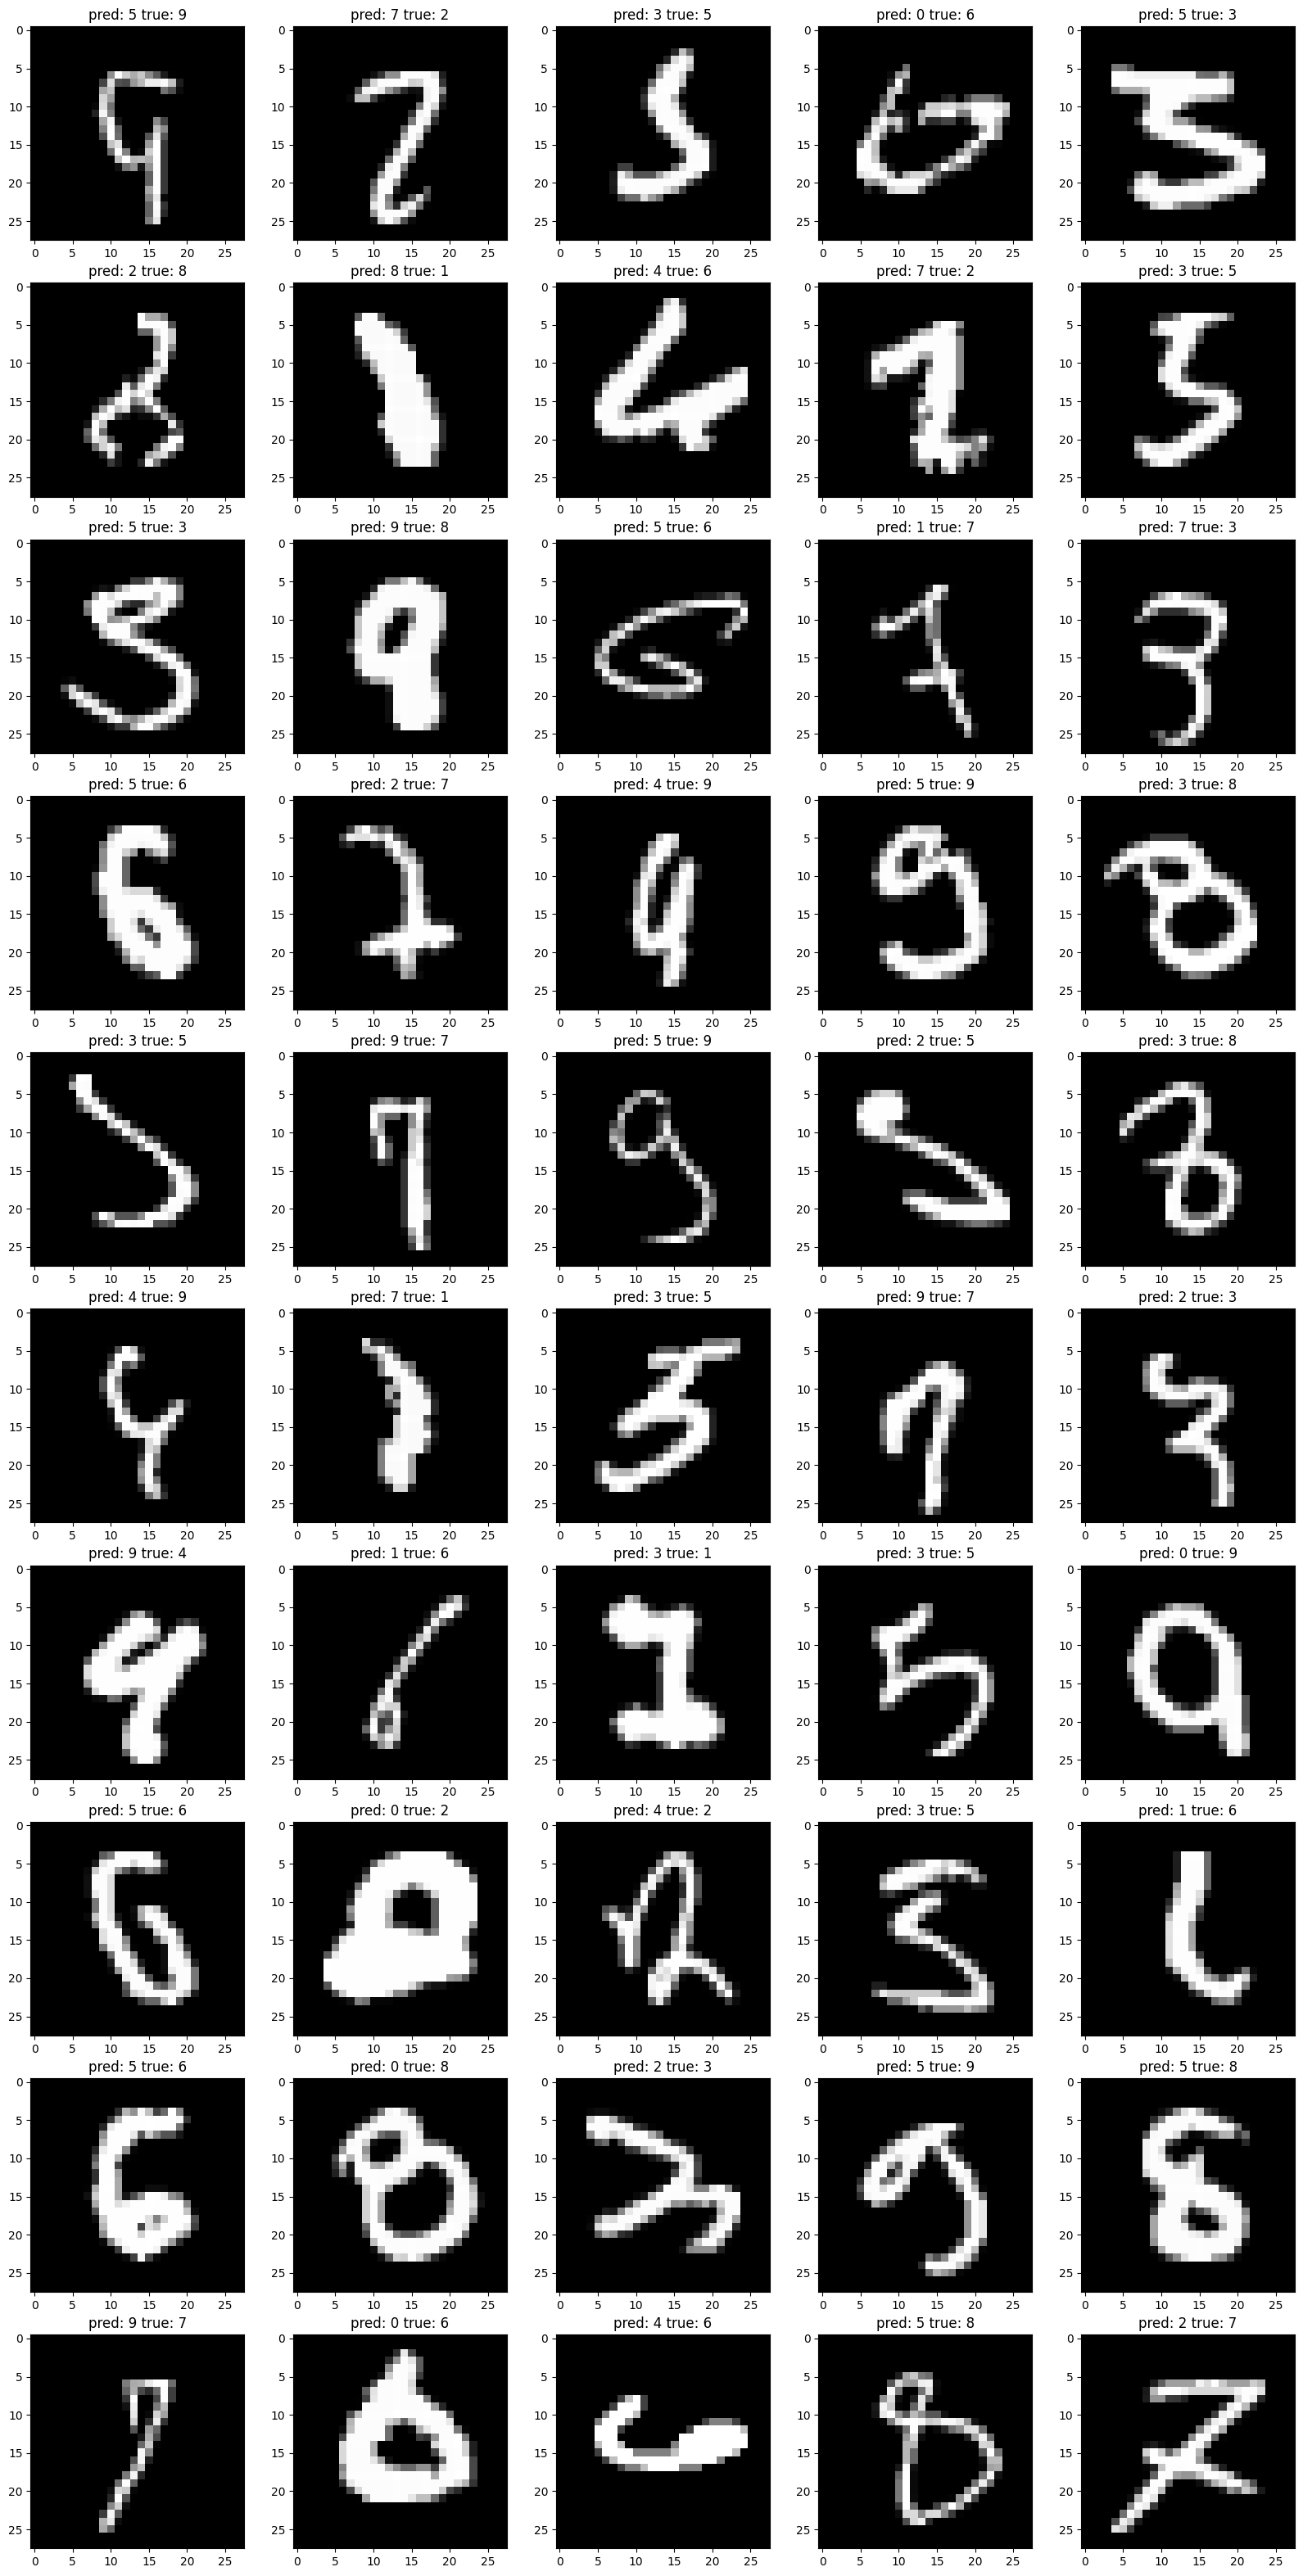

In [40]:
plt.figure(figsize=(20,40))
for i in range(0,50):
  plt.subplot(10,5,i+1)
  plt.imshow(x_digits_test[wrong_idx[i],:,:,0],cmap="gray")
  plt.title("pred: "+str(np.argmax(model_digits_full.predict(x_digits_test[wrong_idx[i:(i+1)]]), axis=1)[0])+ " true: "+str((y_digits_test[wrong_idx[i]])))
